In [0]:
%reload_ext autoreload
%autoreload 2

In [0]:
import fastai
import fastai.tabular as tab

import numpy as np
import torch

In [0]:
path = tab.untar_data(tab.URLs.ADULT_SAMPLE)
df = tab.pd.read_csv(path/'adult.csv')

In [4]:
df.shape

(32561, 15)

In [5]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,49,Private,101320,Assoc-acdm,12.0,Married-civ-spouse,NaN,Wife,White,Female,0,1902,40,United-States,>=50k
1,44,Private,236746,Masters,14.0,Divorced,Exec-managerial,Not-in-family,White,Male,10520,0,45,United-States,>=50k
2,38,Private,96185,HS-grad,NaN,Divorced,NaN,Unmarried,Black,Female,0,0,32,United-States,<50k
3,38,Self-emp-inc,112847,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,United-States,>=50k
4,42,Self-emp-not-inc,82297,7th-8th,NaN,Married-civ-spouse,Other-service,Wife,Black,Female,0,0,50,United-States,<50k


In [0]:
dep_var = 'salary'
cat_names = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race']
cont_names = ['age', 'fnlwgt', 'education-num']
procs = [tab.FillMissing, tab.Categorify, tab.Normalize]

In [0]:
test = tab.TabularList.from_df(df.iloc[800:1000].copy(), path=path, cat_names=cat_names, cont_names=cont_names)

In [0]:
data = (tab.TabularList.from_df(df, path=path, cat_names=cat_names, cont_names=cont_names, procs=procs)
                            .split_by_idx(list(range(800,1000)))
                            .label_from_df(cols=dep_var)
                            .add_test(test)
                            .databunch())

In [9]:
data.show_batch(rows=10)

workclass,education,marital-status,occupation,relationship,race,education-num_na,age,fnlwgt,education-num,target
Private,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,Black,False,0.0303,-0.1273,0.7511,<50k
Private,HS-grad,Never-married,Machine-op-inspct,Own-child,White,True,-0.7760,-0.8485,-0.0312,<50k
Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,True,-0.5561,0.4445,-0.0312,>=50k
?,Prof-school,Married-civ-spouse,?,Wife,White,False,2.2292,0.0936,1.9245,<50k
Private,HS-grad,Separated,Protective-serv,Own-child,Black,False,-0.9959,0.7196,-0.4224,<50k
Self-emp-inc,5th-6th,Married-civ-spouse,Craft-repair,Husband,White,False,0.4701,-0.3229,-2.7692,>=50k
Private,Masters,Married-civ-spouse,Exec-managerial,Husband,White,False,-0.4828,0.1879,1.5334,>=50k
State-gov,HS-grad,Married-civ-spouse,#na#,Husband,White,False,1.2763,4.5657,-0.4224,>=50k
Self-emp-inc,HS-grad,Divorced,Sales,Unmarried,White,False,-0.0430,-0.4564,-0.4224,<50k
State-gov,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,False,0.3235,0.3910,-0.4224,<50k


In [0]:
learner = tab.tabular_learner(data, layers=[200,100], metrics=tab.accuracy)

In [17]:
learner.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(10, 6)
    (1): Embedding(17, 8)
    (2): Embedding(8, 5)
    (3): Embedding(16, 8)
    (4): Embedding(7, 5)
    (5): Embedding(6, 4)
    (6): Embedding(3, 3)
  )
  (emb_drop): Dropout(p=0.0, inplace=False)
  (bn_cont): BatchNorm1d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=42, out_features=200, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Linear(in_features=200, out_features=100, bias=True)
    (4): ReLU(inplace=True)
    (5): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Linear(in_features=100, out_features=2, bias=True)
  )
)

In [18]:
learner.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 1.00E-01
Min loss divided by 10: 2.51E-02


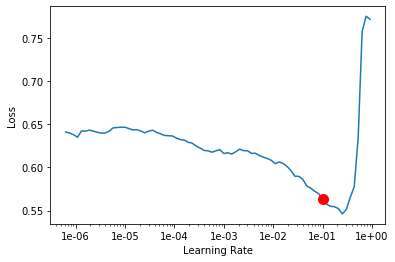

In [19]:
learner.recorder.plot(suggestion=True)

In [20]:
learner.fit(1, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.365887,0.388660,0.830000,00:04


In [21]:
learner.predict(df.iloc[0])

(Category >=50k, tensor(1), tensor([0.4107, 0.5893]))